In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('netflix_titles.csv')

In [3]:
data

,show_id,type,title,country,release_year,duration(min),listed_in
0,80125979,Movie,#realityhigh,United States,2017,99,Comedies
1,80203094,Movie,City of Joy,United States,2018,77,Documentaries
2,80095641,Movie,Elstree 1976,United Kingdom,2015,102,Documentaries
3,80182115,Movie,Long Shot,United States,2017,40,Documentaries
4,81001809,Movie,Lessons from a School Shooting: Notes from Dun...,United States,2018,24,Documentaries
5,80173625,Movie,Restless Creature: Wendy Whelan,United States,2016,94,Documentaries
6,80005444,Movie,Print the Legend,United States,2014,100,Documentaries
7,80198423,Movie,Teach Us All,United States,2017,81,Documentaries
8,80097321,Movie,Audrie & Daisy,United States,2016,99,Documentaries
9,80059432,Movie,SMOSH: The Movie,United States,2015,83,Comedies


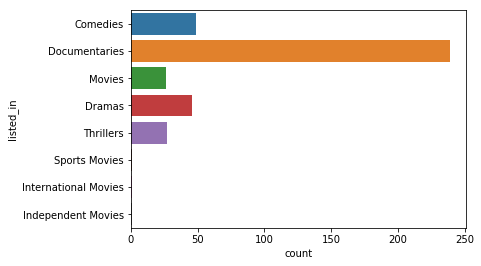

In [4]:
data.groupby("listed_in").size()
sns.countplot(y="listed_in", data=data);

In [5]:
data.head()

,show_id,type,title,country,release_year,duration(min),listed_in
0,80125979,Movie,#realityhigh,United States,2017,99,Comedies
1,80203094,Movie,City of Joy,United States,2018,77,Documentaries
2,80095641,Movie,Elstree 1976,United Kingdom,2015,102,Documentaries
3,80182115,Movie,Long Shot,United States,2017,40,Documentaries
4,81001809,Movie,Lessons from a School Shooting: Notes from Dun...,United States,2018,24,Documentaries


In [6]:
data.groupby("country").size()

country
Australia           5
Austria             1
Canada             13
Denmark             1
India               1
Italy               1
Japan               1
New Zealand         2
Spain               1
United Kingdom     50
United States     314
dtype: int64

In [7]:
data.groupby("listed_in").size()

listed_in
Comedies                 49
Documentaries           239
Dramas                   46
Independent Movies        1
International Movies      1
Movies                   26
Sports Movies             1
Thrillers                27
dtype: int64

In [8]:
data.groupby("release_year").size()

release_year
2010      5
2011      8
2012      7
2013     13
2014     21
2015     31
2016     77
2017    103
2018     77
2019     48
dtype: int64

In [9]:
class Perceptron():
    #vytvorenie metody init, v ktorej definujeme premenne rychlost ucenia a pocet iteracii a pridelujeme im zakladne hodnoty.
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=10):
        self.eta = rychlost_ucenia 
        self.n_iter = pocet_iteracii      
    
    #vytvorenie metody fit, v ktorej bude prebiehat tzv. proces ucenia.
    def fit(self, X,y):
        #metoda fit pracuje s trenovacou maticou X a polem y naplnemym ocakavanym vysledkom.
        
        #pole vah na zaciatku je naplnene nulami
        #sirka pola vah je 1+(pocet prvkov v riadku matice x)
        self.vahy = np.zeros(1+ X.shape[1])
        
        #pole errors_ bude sluzit na zobrazenie chyb po kazdej iteracii
        self.errors_=[]
        
        #pole vahy_graf bude sluzit na zobrazenie vah po kazdej iteracii
        self.vahy_graf=[]
        
        #pomocou for cyklu vykoname potrebny nam pocet iteracii, ktory sme nastavili hore v nasej vytvorenej premennej
        for i in range(self.n_iter):
            #pomocou errors budeme vediet kolko chyb nastalo pocas iteracii
            errors = 0
            
            #vypis vah pred iteraciou
            print("Vahy pred " + str(i+1) + ". iteraciou:")
            print(self.vahy)
            
            #pomocou tohto for cyklu prejdeme vsetky zaznamy v trenovacej matici X a v pole y.
            for matica,vystup in zip(X,y):
                
                #pomocou tejto premenej vieme napravit vahy na potrebny nam smer, ked vystupna hodnota nebude 0
                update = self.eta * (vystup-self.predikcia(matica))
                
                #pomocou hodhoty update upravime nase vahy
                self.vahy[1:] += update*matica
                self.vahy[0]+= update
                
                #ked hodnota update je ina ako 0, znamena to ze nastala chyba, vtedy hodnota premenej errors bude zvysena.
                errors += int(update !=0.0)
            
            #vypis vah po iteracii
            print("Vahy po " + str(i+1) + ". iteracii:")
            print(self.vahy)
            
            #vypis chyb iteraci
            print("Pocet chyb: " + str(errors) + '\n')   
            
            #ukladanie poctu chyb po kazdej iteracii, ktore nasledne pouzijeme na vykreslenie grafu
            self.errors_.append(errors)
            
            #ukladanie hodnot jednotlivych vah po kazdej iteracii
            self.vahy_graf.append([self.vahy[0], self.vahy[1], self.vahy[2]])
        return self  

    #pomocou metody net_input vieme vypocitat vystup perceptronu
    def net_input(self, X):
        return np.dot(X, self.vahy[1:])+ self.vahy[0]

    #pomocou matody predikcia urcime typ kosatca, vrati 1 ked vystupna hodnota net_input je vacsia alebo rovna 0,
    #alebo vrati -1 ked hodnota je mensia ako 0
    def predikcia(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [10]:
X = data.iloc[0:390, [4,5]].values
y = data.iloc[0:390, 6].values

y = np.where(y == 'Documentaries', -1, 1)

print(X[:5])
print(y)

[[2017   99]
 [2018   77]
 [2015  102]
 [2017   40]
 [2018   24]]
[ 1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1  1  1  1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1
  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1 -1  1 -1  1
  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1 -1
 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1  1  1  1 -1
  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1
  1 -1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1
 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1 -1  1 

In [11]:
moj_perceptron = Perceptron()

In [12]:
moj_perceptron.fit(X, y)

Vahy pred 1. iteraciou:
[0. 0. 0.]
Vahy po 1. iteracii:
[-2.000e-02 -3.992e+01  2.660e+00]
Pocet chyb: 177

Vahy pred 2. iteraciou:
[-2.000e-02 -3.992e+01  2.660e+00]
Vahy po 2. iteracii:
[-2.000e-02 -3.956e+01  6.460e+00]
Pocet chyb: 176

Vahy pred 3. iteraciou:
[-2.000e-02 -3.956e+01  6.460e+00]
Vahy po 3. iteracii:
[-2.000e-02 -3.920e+01  1.026e+01]
Pocet chyb: 176

Vahy pred 4. iteraciou:
[-2.000e-02 -3.920e+01  1.026e+01]
Vahy po 4. iteracii:
[-2.000e-02 -3.884e+01  1.406e+01]
Pocet chyb: 176

Vahy pred 5. iteraciou:
[-2.000e-02 -3.884e+01  1.406e+01]
Vahy po 5. iteracii:
[-2.000e-02 -3.848e+01  1.786e+01]
Pocet chyb: 176

Vahy pred 6. iteraciou:
[-2.000e-02 -3.848e+01  1.786e+01]
Vahy po 6. iteracii:
[-2.000e-02 -3.812e+01  2.166e+01]
Pocet chyb: 176

Vahy pred 7. iteraciou:
[-2.000e-02 -3.812e+01  2.166e+01]
Vahy po 7. iteracii:
[-2.000e-02 -3.776e+01  2.546e+01]
Pocet chyb: 176

Vahy pred 8. iteraciou:
[-2.000e-02 -3.776e+01  2.546e+01]
Vahy po 8. iteracii:
[-2.000e-02 -3.740e+

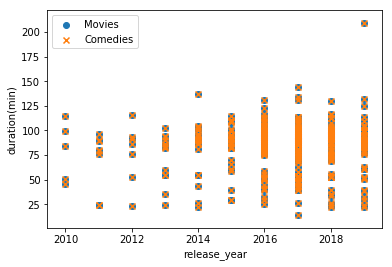

In [13]:
plt.scatter(X[0:390,0],X[0:390,1], marker='o', label='Movies')
plt.scatter(X[0:390,0],X[0:390,1], marker='x', label='Comedies')

plt.xlabel('release_year')
plt.ylabel('duration(min)')
plt.legend()

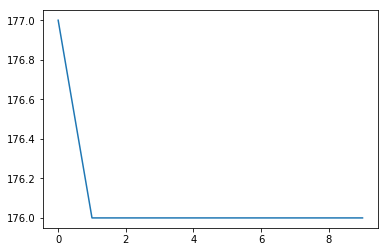

In [14]:
plt.plot(moj_perceptron.errors_)

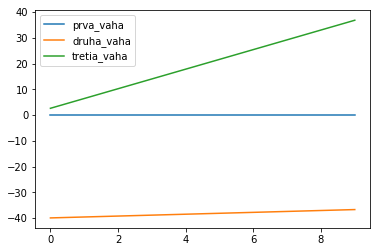

In [15]:
vahydata = ["prva_vaha", "druha_vaha", "tretia_vaha"]
plt.plot(moj_perceptron.vahy_graf)
plt.legend(vahydata)